# Aplicando Análise de Dados ao Marketing.
Autor: João Trajano de Souza Neto.

# Sobre o Trabalho.

O objetivo geral deste trabalho é: empregar a análise e mineração de dados, nos processos de extração do conhecimento na área do marketing. Para atingir este objetivo geral, os objetivos específicos são conhecer os processos de negócios que envolvem o marketing; analisar os dados, testando hipóteses á possíveis padrões em meio a esses dados, usando o framework Pandas; criar modelos de visualização destes dados, usando Matplotilib e Seaborn e, criar um modelo preditivo usando o Scikit-Learn, usando o método de aprendizagem supervisionada.

A base dados usada para o andamento deste estudo, pode ser acessada através do site Kaggle: https://www.kaggle.com/rodsaldanha/arketing-campaign

In [1]:
# -- importando as bibliotecas necessárias.

import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

%matplotlib inline 

In [322]:
camping_marketing = pd.read_excel('../marketing_campaign.xlsx') # -- importando a base de dados.

# Informações Básicas

In [28]:
camping_marketing.head(20) # -- Seleciona as dez primeiras linhas do dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [5]:
camping_marketing.info() # -- Retornando o número de linhas e colunas, e o tipo de dado de cada coluna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
camping_marketing.describe() # -- Mostrando informações de cunho estatístico das informações de cada coluna.

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


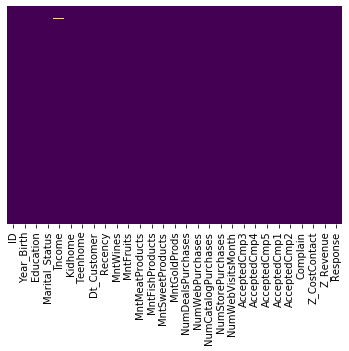

In [130]:
sbn.heatmap(camping_marketing.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [221]:
def preencher_valor_medio(col):
    
    income = col[0]
    media = camping_marketing['Income'].mean()
    
    if np.isnan(income):   
        return media
    else:
        return income

In [272]:
camping_marketing['Income'] = camping_marketing[['Income']].apply(preencher_valor_medio, axis=1)

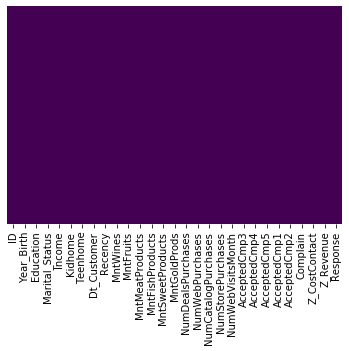

In [273]:
sbn.heatmap(camping_marketing.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
def retirar_espaco(col):
    
    education = col[0]
    
    if education == '2n Cycle':
        education = education.replace(' ', '')
        return education.replace(' ', '')
    else:
        return education

In [37]:
camping_marketing['Education'] = camping_marketing[['Education']].apply(retirar_espaco,axis=1)

In [43]:
camping_marketing.head(20) # -- Seleciona os 20 primeiras linhas do dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


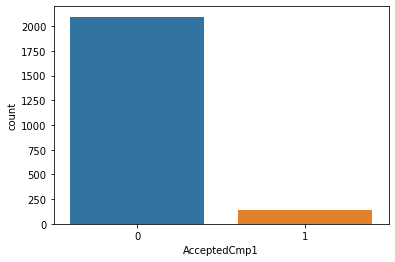

In [230]:
sbn.countplot(x='AcceptedCmp1', data=camping_marketing)

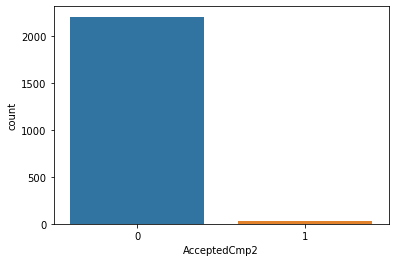

In [231]:
sbn.countplot(x='AcceptedCmp2', data=camping_marketing)

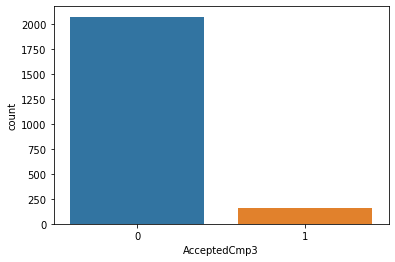

In [232]:
sbn.countplot(x='AcceptedCmp3', data=camping_marketing)

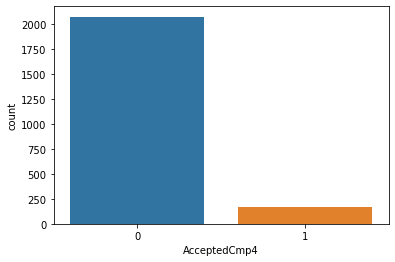

In [233]:
sbn.countplot(x='AcceptedCmp4', data=camping_marketing)

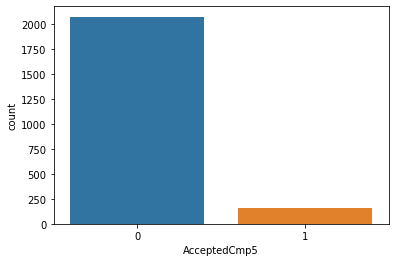

In [234]:
sbn.countplot(x='AcceptedCmp5', data=camping_marketing)

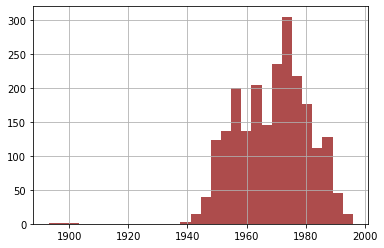

In [237]:
camping_marketing['Year_Birth'].hist(bins=30,color='darkred',alpha=0.7)

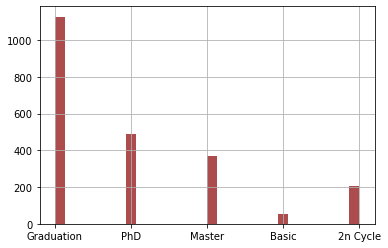

In [48]:
camping_marketing['Education'].hist(bins=30,color='darkred',alpha=0.7)

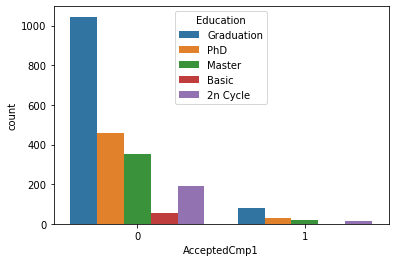

In [263]:
sbn.countplot(x='AcceptedCmp1', hue='Education', data=camping_marketing)

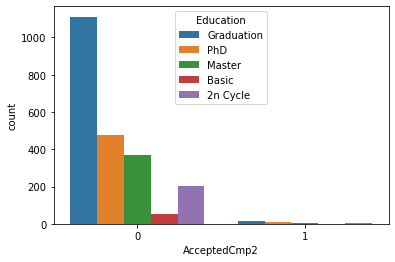

In [264]:
sbn.countplot(x='AcceptedCmp2', hue='Education', data=camping_marketing)

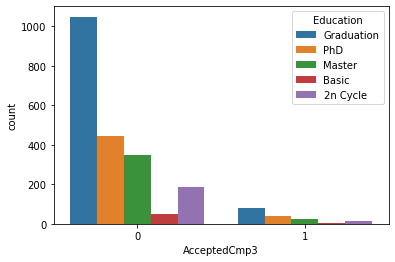

In [265]:
sbn.countplot(x='AcceptedCmp3', hue='Education', data=camping_marketing)

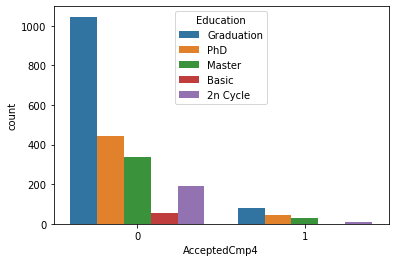

In [267]:
sbn.countplot(x='AcceptedCmp4', hue='Education', data=camping_marketing)

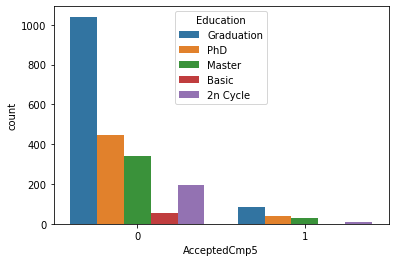

In [268]:
sbn.countplot(x='AcceptedCmp5', hue='Education', data=camping_marketing)

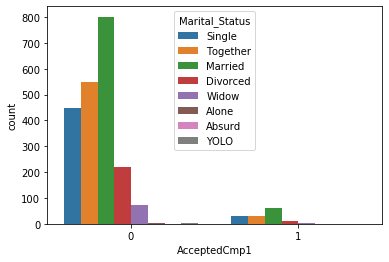

In [4]:
sbn.countplot(x='AcceptedCmp1', hue='Marital_Status', data=camping_marketing)

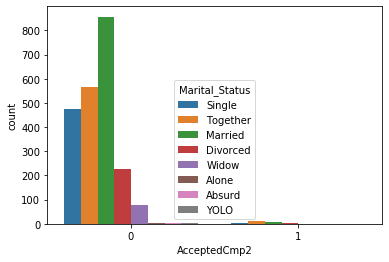

In [5]:
sbn.countplot(x='AcceptedCmp2', hue='Marital_Status', data=camping_marketing)

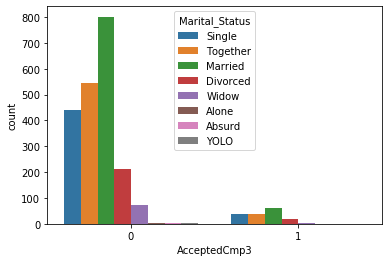

In [6]:
sbn.countplot(x='AcceptedCmp3', hue='Marital_Status', data=camping_marketing)

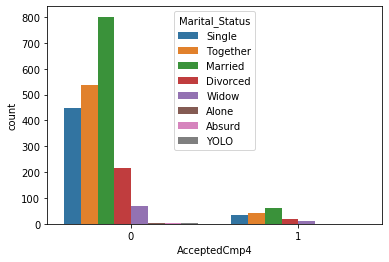

In [7]:
sbn.countplot(x='AcceptedCmp4', hue='Marital_Status', data=camping_marketing)

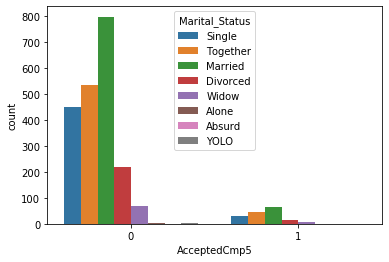

In [8]:
sbn.countplot(x='AcceptedCmp5', hue='Marital_Status', data=camping_marketing)

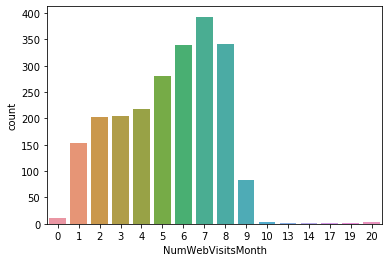

In [43]:
sbn.countplot(x='NumWebVisitsMonth', data=camping_marketing)

In [3]:
def porcentagem_campanha(col):
    
    cont_aceitou = 0
    cont_nao_aceitou = 0
    array = []
    total = col.count()
    
    for x in col:
        if x == 1:
            cont_aceitou = cont_aceitou + 1
        else:
            cont_nao_aceitou = cont_nao_aceitou + 1
    
    percent_aceitou = (cont_aceitou / total) * 100
    percent_nao_aceitou = (cont_nao_aceitou / total) * 100
    
    array_dict = dict({'Porcentagem de pessoas que aceitaram':percent_aceitou , 
                              'Porcentagem de pessoas que não aceitaram':percent_nao_aceitou})
    return array_dict

In [461]:
dicionario = dict()
for i in range(1,6):
   dicionario['AcceptedCmp{}'.format(i)] = porcentagem_campanha(camping_marketing['AcceptedCmp{}'.format(i)])

In [462]:
dicionario

{'AcceptedCmp1': {'Porcentagem de pessoas que aceitaram': 6.428571428571428,
  'Porcentagem de pessoas que não aceitaram': 93.57142857142857},
 'AcceptedCmp2': {'Porcentagem de pessoas que aceitaram': 1.3392857142857142,
  'Porcentagem de pessoas que não aceitaram': 98.66071428571429},
 'AcceptedCmp3': {'Porcentagem de pessoas que aceitaram': 7.276785714285714,
  'Porcentagem de pessoas que não aceitaram': 92.72321428571428},
 'AcceptedCmp4': {'Porcentagem de pessoas que aceitaram': 7.455357142857142,
  'Porcentagem de pessoas que não aceitaram': 92.54464285714286},
 'AcceptedCmp5': {'Porcentagem de pessoas que aceitaram': 7.276785714285714,
  'Porcentagem de pessoas que não aceitaram': 92.72321428571428}}

In [7]:
dataFrame_AcceptedCmp_percent= pd.DataFrame(dicionario)

In [8]:
dataFrame_AcceptedCmp_percent

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Porcentagem de pessoas que aceitaram,6.428571,1.339286,7.276786,7.455357,7.276786
Porcentagem de pessoas que não aceitaram,93.571429,98.660714,92.723214,92.544643,92.723214


In [143]:
from matplotlib.pyplot import figure

In [149]:
def criar_grafico(tam, linha, arrayListColumns):
    arrayList_values = []
    cont = 0
    fig, axs = plt.subplots(figsize=(12,5))
    
    for x in range(1,tam):
        arrayList_values.append(dataFrame_AcceptedCmp_percent['AcceptedCmp{}'.format(x)][linha])

    for x in arrayList_values:
        axs.annotate('{:.2f}%'.format(x),xy =(cont, x + 0.1))
        cont = cont + 1

    labels_AcceptedCmp = [i for i in arrayListColumns]

    axs.bar(labels_AcceptedCmp,arrayList_values, tick_label=labels_AcceptedCmp)

In [150]:
columns_AcceptedCmp = dataFrame_AcceptedCmp_percent.columns

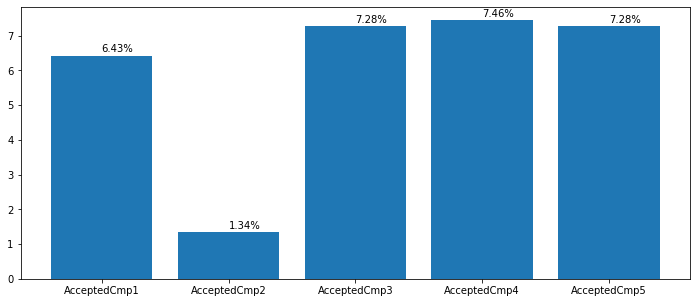

In [154]:
criar_grafico(np.size(columns_AcceptedCmp) + 1, 0,columns_AcceptedCmp) # -- grafico_aceitacao_por_campanha 

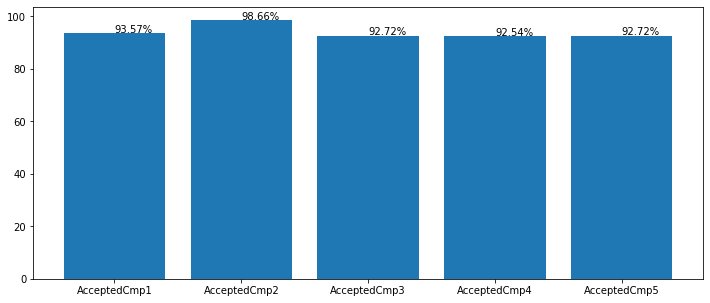

In [155]:
criar_grafico(np.size(columns_AcceptedCmp) + 1, 1,columns_AcceptedCmp) # -- grafico_negacao_por_campanha

In [477]:
def gerar_dataframe_agrupado_por_education(camping):
    dicionario_temp = dict()
    arrayListEducation_dict = dict()
    arrayListEducation = []
    array_dict = []
    array_final = dict()
    
    camping_marketing_agrupado = camping_marketing.groupby(['Education'])[camping]
    
    for i, rows in camping_marketing_agrupado:
        dicionario_temp[i] = rows
        arrayListEducation.append(i)
        
    for education in arrayListEducation:
        array = []
    
        for x in dicionario_temp[education]:
            array.append(x)
        
        arrayListEducation_dict[education] = array
        
    for x in arrayListEducation_dict:
        cont_not = 0
        cont = 0
    
        for j in arrayListEducation_dict[x]:
            total = np.size(arrayListEducation_dict[x])
        
            if j == 0:
                cont_not = cont_not + 1
            else:
                cont = cont + 1     
    
        array_final[x] = dict({'Não Aceitou':cont_not, 'Aceitou'.format(x):cont})
        
    return pd.DataFrame(array_final)

In [483]:
gerar_dataframe_agrupado_por_education('AcceptedCmp1')

,2n Cycle,Basic,Graduation,Master,PhD
Não Aceitou,189,54,1045,352,456
Aceitou,14,0,82,18,30


In [ ]:
# no mesmo gráfico, mostrar de forma geral, e por graduação.
# depois por renda.
